Davies-Bouldin Index for different cluster sizes:
Number of Clusters: 2, DB Index: 0.4566, Silhouette Score: 0.6626
Number of Clusters: 3, DB Index: 0.4549, Silhouette Score: 0.6414
Number of Clusters: 4, DB Index: 0.4201, Silhouette Score: 0.6361
Number of Clusters: 5, DB Index: 0.4942, Silhouette Score: 0.6074
Number of Clusters: 6, DB Index: 0.5648, Silhouette Score: 0.5583
Number of Clusters: 7, DB Index: 0.5330, Silhouette Score: 0.5769
Number of Clusters: 8, DB Index: 0.5377, Silhouette Score: 0.5693
Number of Clusters: 9, DB Index: 0.5781, Silhouette Score: 0.5460
Number of Clusters: 10, DB Index: 0.5840, Silhouette Score: 0.5365

Optimal Number of Clusters: 4


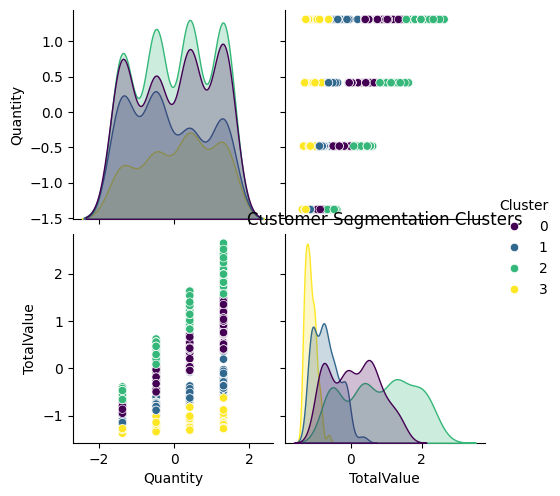

Clustering results saved to 'Poornima M_Nerale_Clustering.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score  


customer_data = pd.read_csv('Customers.csv')
transaction_data = pd.read_csv('Transactions.csv')
product_data = pd.read_csv('Products.csv')


combined_data = pd.merge(transaction_data, customer_data, on='CustomerID', how='inner')
combined_data = pd.merge(combined_data, product_data, on='ProductID', how='inner')


combined_data.fillna(0, inplace=True)


combined_data['TransactionDate'] = pd.to_datetime(combined_data['TransactionDate'])


combined_data['transaction_year'] = combined_data['TransactionDate'].dt.year
combined_data['transaction_month'] = combined_data['TransactionDate'].dt.month
combined_data['transaction_day'] = combined_data['TransactionDate'].dt.day


combined_data.drop(columns=['TransactionDate'], inplace=True)


scaler = StandardScaler()
combined_data[['Quantity', 'TotalValue']] = scaler.fit_transform(
    combined_data[['Quantity', 'TotalValue']]
)


encoded_data = pd.get_dummies(combined_data, columns=['Category', 'Region'], drop_first=True)


non_numeric_columns = ['CustomerID', 'CustomerName', 'TransactionID']
encoded_data = encoded_data.drop(columns=non_numeric_columns, errors='ignore')

X = encoded_data.select_dtypes(include=[np.number]).values 


db_index_results = {}
silhouette_scores = {} 

for n_clusters in range(2, 11):  
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    db_index = davies_bouldin_score(X, kmeans.labels_)
    silhouette_avg = silhouette_score(X, kmeans.labels_) 
    
    db_index_results[n_clusters] = db_index
    silhouette_scores[n_clusters] = silhouette_avg  


print("Davies-Bouldin Index for different cluster sizes:")
for n_clusters, db_index in db_index_results.items():
    silhouette_score_value = silhouette_scores[n_clusters]
    print(f"Number of Clusters: {n_clusters}, DB Index: {db_index:.4f}, Silhouette Score: {silhouette_score_value:.4f}")


optimal_n_clusters = min(db_index_results, key=db_index_results.get)
print(f"\nOptimal Number of Clusters: {optimal_n_clusters}")


kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_optimal.fit(X)


encoded_data['Cluster'] = kmeans_optimal.labels_


sns.pairplot(encoded_data, hue='Cluster', vars=['Quantity', 'TotalValue'], palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()


encoded_data.to_csv('Poornima M_Nerale_Clustering.csv', index=False)
print("Clustering results saved to 'Poornima M_Nerale_Clustering.csv'")